#    PROJECT - CUSTOMER SEGMENTATION

In [93]:
# Data handling
import pandas as pd
import numpy as np

# Clustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## Pre-Processing Data

In [94]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [95]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [96]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [98]:
# df = df.loc[df.TotalCharges!=" ", :]       #### removing empty values
df.TotalCharges = df.TotalCharges.astype(float)  # making float 


# Label data correctly
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies', 'Partner', 'Dependents',
               'PhoneService', 'MultipleLines', 'PaperlessBilling', 'Churn']
for i in replace_cols : 
    df.loc[:, i]  = df.loc[:, i].replace({'No internet service' : 'No', 'No phone service':'No'})
    df.loc[:, i]  = df.loc[:, i].map({'No':0, 'Yes':1})
    
df.gender = df.gender.map({"Female":0, "Male":1})

df=df.drop(['customerID'], 1)

In [99]:
# One-hot encoding of variables
others_categorical = ['Contract', 'PaymentMethod', 'InternetService']
for i in others_categorical:
    df = df.join(pd.get_dummies(df[i], prefix=i))
df.drop(others_categorical, axis=1, inplace=True)

In [100]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,1,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,0,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [101]:
df.tail()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
7038,1,0,1,1,24,1,1,1,0,1,...,0,1,0,0,0,0,1,1,0,0
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,0,1,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,0,0,1,0,1,0,0
7041,1,1,1,0,4,1,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
7042,1,0,0,0,66,1,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0


In [102]:
df.isna().sum()

gender                                     0
SeniorCitizen                              0
Partner                                    0
Dependents                                 0
tenure                                     0
PhoneService                               0
MultipleLines                              0
OnlineSecurity                             0
OnlineBackup                               0
DeviceProtection                           0
TechSupport                                0
StreamingTV                                0
StreamingMovies                            0
PaperlessBilling                           0
MonthlyCharges                             0
TotalCharges                               0
Churn                                      0
Contract_Month-to-month                    0
Contract_One year                          0
Contract_Two year                          0
PaymentMethod_Bank transfer (automatic)    0
PaymentMethod_Credit card (automatic)      0
PaymentMet

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   7032 non-null   int64  
 1   SeniorCitizen                            7032 non-null   int64  
 2   Partner                                  7032 non-null   int64  
 3   Dependents                               7032 non-null   int64  
 4   tenure                                   7032 non-null   int64  
 5   PhoneService                             7032 non-null   int64  
 6   MultipleLines                            7032 non-null   int64  
 7   OnlineSecurity                           7032 non-null   int64  
 8   OnlineBackup                             7032 non-null   int64  
 9   DeviceProtection                         7032 non-null   int64  
 10  TechSupport                              7032 no

In [104]:
df.describe()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,...,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.504693,0.162400,0.482509,0.298493,32.421786,0.903299,0.421928,0.286547,0.344852,0.343857,...,0.551052,0.209329,0.239619,0.219283,0.216297,0.336320,0.228100,0.343572,0.440273,0.216155
std,0.500014,0.368844,0.499729,0.457629,24.545260,0.295571,0.493902,0.452180,0.475354,0.475028,...,0.497422,0.406858,0.426881,0.413790,0.411748,0.472483,0.419637,0.474934,0.496455,0.411650
min,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Exploratory Data Analysis (EDA)

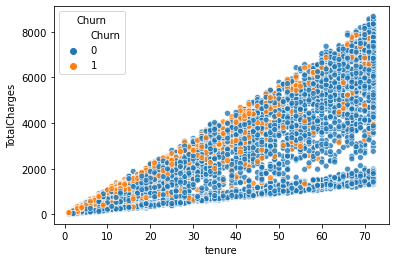

<Figure size 1000x800 with 0 Axes>

In [105]:
sns.scatterplot(data=df,x='tenure',y='TotalCharges',hue='Churn',alpha=0.8)
plt.legend( title = "Churn")
plt.figure(figsize=(10,8),dpi=100)
plt.savefig("Scatterplot.jpg", dpi=300)

The Scatterplot shows somewhat of a realtionship where as tenure increases customers tend to churn less.
This data makes sense in a realsitic world setting as customers who have stay longer with a company are less likely to leave.

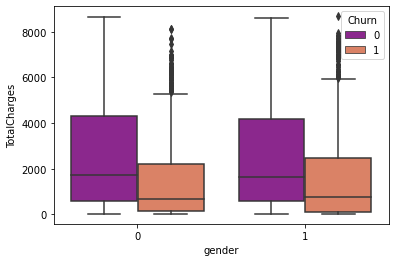

<Figure size 4500x5400 with 0 Axes>

In [106]:
sns.boxplot(data=df,x='gender',y='TotalCharges',hue='Churn',palette='plasma')
plt.legend(title = "Churn")
plt.figure(figsize=(15,18),dpi=300)
plt.savefig("boxplot_TotalCharges.jpg", dpi=300)

The Boxplot shows a couple outliers which dont seem to unreasonable so we will ignore them to further maintain the purity of the dataset.

The Boxplot also shows regardless of gender, people who have higher TotalCharges tend to churn less with almsot identical representations for both genders.

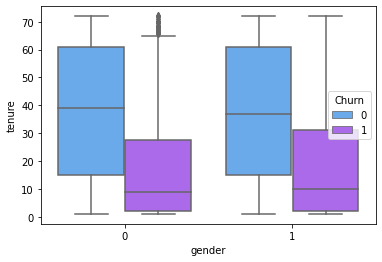

<Figure size 1000x800 with 0 Axes>

In [107]:
sns.boxplot(data=df,x='gender',y='tenure',hue='Churn',palette='cool')
plt.legend(title = "Churn")
plt.figure(figsize=(10,8),dpi=100)
plt.savefig("boxplot_tenure.jpg", dpi=300)

The Boxplot shows few tenure outliers for Females who Churn.

However as this are miniscule we wont be further exploring those outliers. The barplot also shows regardless of gender, people who have a lower tenure period tend to churn more with identical representations for both genders.

## CLUSTERING

### Kmeans

In [87]:
X = df.iloc[:, [4, 14]].values

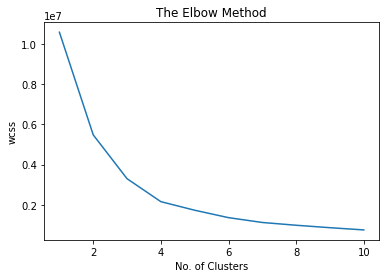

In [119]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)                 # fitting the model
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [115]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(df) # fitting the model

KMeans(n_clusters=4)

In [116]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', max_iter=300, n_init=10)
y_kmeans = kmeans.fit_predict(X)

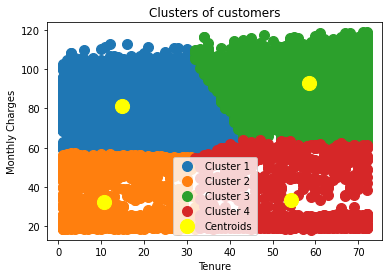

<Figure size 432x288 with 0 Axes>

In [117]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, cmap='rainbow', label = 'Cluster 1') # New High Usage Customers
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, cmap='rainbow', label = 'Cluster 2') # New Old Usage Customers
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, cmap='rainbow', label = 'Cluster 3') # Old High Usage Customers
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, cmap='rainbow', label = 'Cluster 4') # Old Low Usage Customers
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Tenure')
plt.ylabel('Monthly Charges')
plt.legend()
plt.show()
plt.savefig("Kmeans_clusters.jpg", dpi=300)

The above diagram shows how tenure affects the Monthly charges , our target 10% population would be Blue, Since their tenure is less i.e., new comers and their spend is kind of average/high . If the company interested in retaining the new customers for longer term.

### DBSCAN 

One way to see the differences between clusters is to take the average value of each cluster and visualize it. 

In [26]:
min_samples = df.shape[1]+1 #  Rule of thumb; number of dimensions D in the data set, as minPts ≥ D + 1
dbscan = DBSCAN(eps=3.5, min_samples=min_samples).fit(df)

In [118]:
# The least distance required for two points to be termed as a neighbor. This is known as Epsilon (Eps).

In [27]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns
df_scaled['dbscan'] = dbscan.labels_

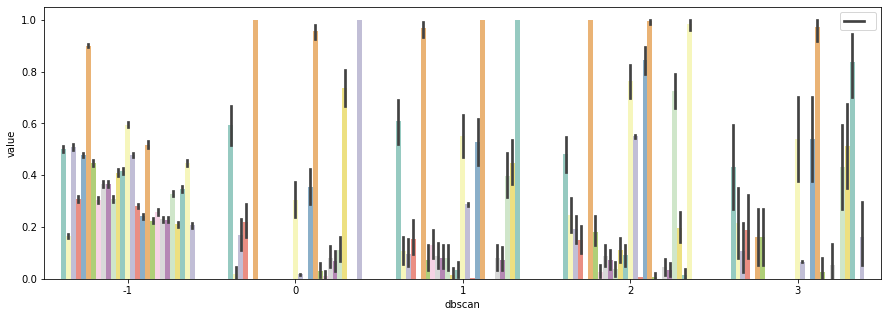

In [28]:
df['dbscan'] = dbscan.labels_
tidy = df_scaled.melt(id_vars='dbscan')
fig = plt.subplots(figsize=(15, 5))
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy, palette='Set3')
plt.legend([''])
plt.savefig("dbscan_mess.jpg", dpi=300)

The problem with this approach is that we simply have too many variables. Not all of them are likely to be important when creating the clusters. Instead, We will select the most important columns based on the following approach: 

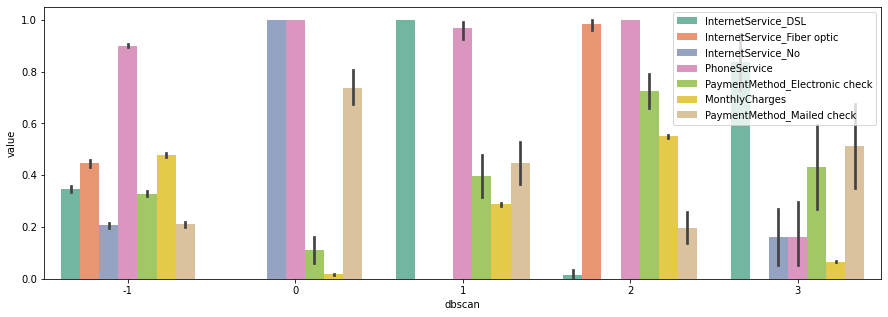

In [112]:
# Setting all variables between 0 and 1 in order to better visualize the results
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df))
df_scaled.columns = df.columns
df_scaled['dbscan'] = dbscan.labels_ # getting the labels

# Calculate variables with largest differences (by standard deviation)
# The higher the standard deviation in a variable based on average values for each cluster
# The more likely that the variable is important when creating the cluster
df_mean = df_scaled.loc[df_scaled.dbscan!=-1, :].groupby('dbscan').mean().reset_index()
results = pd.DataFrame(columns=['Variable', 'Std'])
for column in df_mean.columns[1:]:
    results.loc[len(results), :] = [column, np.std(df_mean[column])]
selected_columns = list(results.sort_values('Std', ascending=False).head(7).Variable.values) + ['dbscan']

# Plot data
tidy = df_scaled[selected_columns].melt(id_vars='dbscan')
fig = plt.subplots(figsize=(15, 5))
sns.barplot(x='dbscan', y='value', hue='variable', data=tidy, palette='Set2') # plotting the clusters
plt.legend(loc='upper right')
plt.savefig("dbscan_results.jpg", dpi=300)